# WeRateDogs数据整理

## 收集

In [63]:
import requests
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
pd.set_option('max_colwidth', 300)

In [2]:
# 下载推特图像的预测数据
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [2]:
# 加载数据
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
# 加载tweet补充json文件数据
'''
用python读取json方式
df_list = []
with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file:
        line_json = json.loads(line)
        df_list.append({'tweet_id': line_json['id'],
                        'retweet_count': int(line_json['retweet_count']),
                        'favorite_count': int(line_json['favorite_count'])})
tweet_supply = pd.DataFrame(df_list,columns=['tweet_id', 'retweet_count', 'favorite_count'])
'''
# 用pandas 的 read_json 函数：
tweet_supply = pd.read_json("tweet_json.txt", lines = True)[['id', 'retweet_count', 'favorite_count']]
tweet_supply.columns = ['tweet_id', 'retweet_count', 'favorite_count']

## 评估
下列单元格描述了WeRateDogs数据集中每个表格的各列情况。为了观察表格与对应的描述，通过显示收集的 pandas DataFrame，显示整个表格。这个任务属于 pandas 视觉评估的机械性部分。

In [6]:
# Display the twitter_archive table
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

`twitter_archive`各列包括：
- **推特ID**：每条推特消息的唯一ID
- **答复状态ID**:答复状态ID
- **答复用户ID**:答复用户ID
- **时间戳**:消息发布时间
- **消息来源**:消息发布平台来源
- **消息内容**:发布消息的内容
- **转发状态ID**:转发状态ID
- **转发用户ID**:转发用户ID
- **转发状态时间戳**:转发状态时间戳
- **扩展链接**:包括狗的照片链接
- **评级分子**:评级分子
- **评级分母**:评级分母
- **名字**:狗的名字
- **doggo**:狗的地位。目测提取的数据极少，可能派不上用处。
- **pupper**:
- **puppo**:
- **floofer**:


In [3]:
# Display the image_predictions table
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


通过一个可以对狗狗种类进行分类的[神经网络](https://www.youtube.com/watch?v=2-Ol7ZB0MmU)，运行这份推特档案中的所有图像。获取的结果：一份图像预测结果表格，其中包含了预测结果的前三名，推特 ID，图像 url 以及最可信的预测结果对应的图像编号（由于推特最多包含 4 个图片，所以编号为 1 到 4）。

`image_predictions`各列包括：
- **推特ID**：对应的推特消息ID。是推特链接的最后一部分，位于 "status/" 后面 → https://twitter.com/dog_rates/status/889531135344209921
- **图片链接**：是预测的图像资源链接
- **图像编号**：最可信的预测结果对应的图像编号 → 1 推特中的第一张图片
- **一号预测**：是算法对推特中图片的一号预测 → 金毛犬
- **一号预测的可信度**：是算法的一号预测的可信度 → 95%
- **一号预测该图片是否属于“狗”**：是一号预测该图片是否属于“狗”（有可能是其他物种，比如熊、马等） → True 真
- **二号预测**：同上
- **二号预测可信度**：
- **二号预测图片是否属于“狗”**：
- **三号预测**：
- **三号预测可信度**：
- **三号预测图片是否属于“狗”**：


In [3]:
# Display the tweet_supply table
tweet_supply

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


通过推特 API 获取附加数据。
`tweet_supply`各列包括：
- **推特ID**：对应推特消息的ID
- **转发数量**：转发本条消息的数量
- **喜欢数量**：喜欢本条消息的数量

In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [48]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [3]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,None,None
1205,715928423106027520,NaN,NaN,2016-04-01 15:46:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He's a Yorkshire Piccolope. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715928423...,11,10,Bubbles,None,None,None,None
1527,690360449368465409,NaN,NaN,2016-01-22 02:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Stop sending in lobsters. This is the final wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690360449...,9,10,the,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
1682,681891461017812993,NaN,NaN,2015-12-29 17:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Charlie. He's scholarly af. Quite...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681891461...,10,10,Charlie,None,None,pupper,None
1434,697270446429966336,NaN,NaN,2016-02-10 04:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. He got stuck on his 3rd homew...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697270446...,10,10,Bentley,None,None,None,None
1770,678341075375947776,NaN,NaN,2015-12-19 22:28:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper likes tape. 12/10 https://t.co/cSp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678341075...,12,10,None,None,None,pupper,None
1841,675878199931371520,NaN,NaN,2015-12-13 03:21:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Ok, I'll admit this is a pretty adorable bunny...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/675878199...,11,10,None,None,None,None,None
694,786729988674449408,NaN,NaN,2016-10-14 00:47:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oakley. He has no idea ...,7.594477e+17,4.196984e+09,2016-07-30 17:56:51 +0000,https://twitter.com/dog_rates/status/759447681...,11,10,Oakley,None,None,None,None
251,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I'm proud to announce that Toby is 23...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844979544...,13,10,None,None,None,None,None


In [6]:
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [6]:
twitter_archive.timestamp.sort_values(ascending=False)

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [10]:
# 名字通常都是大写，name 列为小写或者为字符串 'None'为提取的错误值
no_name_mask = (twitter_archive.name.str.islower())|(twitter_archive.name =='None')
# 用 ~no_name_mask 筛选出错误提取了 name 的 text 观察模式
twitter_archive.loc[no_name_mask,["name", "text"]].sample(10)

,name,text
1439,None,These two pirates crashed their ship and don't know what to do now. Very irresponsible of them. Both 9/10 https://t.co/RJvUjgGH5z
1789,None,Not much to say here. I just think everyone needs to see this. 12/10 https://t.co/AGag0hFHpe
101,None,"RT @loganamnosis: Penelope here is doing me quite a divertir. Well done, @dog_rates! Loving the pupdate. 14/10, je jouerais de nouveau. htt…"
1760,None,Here we are witnessing a wild field pupper. Lost his wallet in there. Rather unfortunate. 10/10 good luck pup https://t.co/sZy9Co74Bw
733,None,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u"
872,None,RT @dog_rates: Oh. My. God. 13/10 magical af https://t.co/Ezu6jQrKAZ
1263,None,This pupper got her hair chalked for her birthday. Hasn't told her parents yet. Rebellious af. 11/10 very nifty https://t.co/h1OX2mLtxV
1301,None,We usually don't rate marshmallows but this one's having so much fun in the snow. 10/10 (vid by @kylejk24) https://t.co/NL2KwOioBh
2089,None,Two obedient dogs here. Left one has extra leg sticking out of its back. They each get 9/10. Would pet both at once https://t.co/RGcNPsmAfY
1413,None,This dog is never sure if he's doing the right thing. 10/10 https://t.co/GXq43zFfBu


In [60]:
# excel 中显示rating_numerator和rating_denominator混入了前边text列的内容，通过以下两条语句证明是excel读取csv文件问题,数据正确
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [8]:
twitter_archive.loc[twitter_archive.rating_numerator > 20,["rating_numerator", "text"]]

,rating_numerator,text
188,420,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189,666,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10"
290,182,@markhoppus 182/10
313,960,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
340,75,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"
433,84,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,24,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
695,75,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
763,27,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
902,165,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE


In [9]:
twitter_archive.loc[twitter_archive.rating_denominator != 10,["rating_denominator", "text"]]

,rating_denominator,text
313,0,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
342,15,@docmisterio account started on 11/15/15
433,70,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784,11,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…"
902,150,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068,11,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1120,170,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165,20,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq


In [13]:
# index=784是对1068的转发，内容重复
twitter_archive.loc[[784, 1068]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None


In [49]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [7]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
an             7
Toby           7
Daisy          7
Buddy          7
Bailey         7
Scout          6
Milo           6
Jack           6
Stanley        6
Oscar          6
Koda           6
Bella          6
Dave           6
Jax            6
Rusty          6
Leo            6
George         5
            ... 
Moofasa        1
Iggy           1
Koko           1
Schnitzel      1
Chevy          1
Remus          1
Noah           1
Cannon         1
Dot            1
Torque         1
Iroh           1
Ed             1
Rizzo          1
Jersey         1
Tripp          1
Brudge         1
Billl          1
Deacon         1
Brockly        1
Pinot          1
light          1
Major          1
Jazz           1
Lugan          1
Pavlov         1
Bobb           1
Arnold         1
Peanut        

In [8]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [9]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [10]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [11]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [4]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [19]:
pd.set_option('precision', 10)
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.0750000000e+03,2075.0000000000,2075.0000000000,2075.0000000000,2075.0000000000
mean,7.3845135785e+17,1.2038554217,0.5945482636,0.1345886095,0.0603241686
std,6.7852033330e+16,0.5618750280,0.2711735169,0.1006657394,0.0509059313
min,6.6602088802e+17,1.0000000000,0.0443334000,0.0000000101,0.0000000002
25%,6.7648350714e+17,1.0000000000,0.3644120000,0.0538862500,0.0162224000
50%,7.1199880986e+17,1.0000000000,0.5882300000,0.1181810000,0.0494438000
75%,7.9320344853e+17,1.0000000000,0.8438550000,0.1955655000,0.0918075500
max,8.9242064356e+17,4.0000000000,1.0000000000,0.4880140000,0.2734190000


In [20]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1056,714606013974974464,https://pbs.twimg.com/media/CerKYG8WAAM1aE-.jpg,1,Norfolk_terrier,0.293007,True,Labrador_retriever,0.25619800,True,golden_retriever,0.1296430000,True
287,671154572044468225,https://pbs.twimg.com/media/CVBrhXoWIAAox_C.jpg,1,Labrador_retriever,0.495047,True,Chesapeake_Bay_retriever,0.35018800,True,golden_retriever,0.1424000000,True
168,668988183816871936,https://pbs.twimg.com/media/CUi5M7TXIAAY0gj.jpg,1,Arabian_camel,0.999614,False,bison,0.00022809,False,llama,0.0000671787,False
735,687096057537363968,https://pbs.twimg.com/media/CYkON6CVAAAPXAc.jpg,1,Labrador_retriever,0.417107,True,Chesapeake_Bay_retriever,0.34173000,True,German_short-haired_pointer,0.1777020000,True
829,693622659251335168,https://pbs.twimg.com/media/CaA-IR9VIAAqg5l.jpg,1,malamute,0.449298,True,Siberian_husky,0.38507500,True,Eskimo_dog,0.1634850000,True


In [12]:
# 没有正确识别为狗的数量
len(image_predictions[~(image_predictions.p1_dog | image_predictions.p2_dog | image_predictions.p3_dog)])

324

In [17]:
# 正确识别为狗的数量
len(image_predictions[(image_predictions.p1_dog | image_predictions.p2_dog | image_predictions.p3_dog)])

1751

In [4]:
tweet_supply.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 73.5 KB


In [7]:
tweet_supply.describe()

,tweet_id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


In [25]:
tweet_supply[tweet_supply.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


In [26]:
tweet_supply.retweet_count.value_counts()

1280     5
312      5
745      5
1554     4
1103     4
1201     4
37       4
61       4
606      4
680      4
701      4
182      4
6925     4
8471     4
468      4
252      3
1873     3
2690     3
71       3
118      3
1036     3
516      3
617      3
2142     3
280      3
263      3
521      3
1084     3
698      3
985      3
        ..
2482     1
4533     1
4535     1
441      1
2490     1
445      1
4479     1
377      1
325      1
2422     1
329      1
333      1
8527     1
6480     1
10580    1
345      1
347      1
2400     1
4449     1
705      1
6500     1
357      1
6504     1
361      1
6506     1
367      1
4465     1
2418     1
2420     1
0        1
Name: retweet_count, Length: 1752, dtype: int64

#### 质量
##### `twitter_archive`table
- retweeted_status_id这些转发标记字段有非空值，存在转发的推特信息
- expanded_urls存放推特显示图片字段存在空值
- 'source'是一个分类类型，其中的内容是一个html标签，需要提取分类数据。
- 狗的名字name中有'a','an'和'the',以及''None这样提取错误的多个词。
- 'in_reply_to_status_id','in_reply_to_user_id'这些列大部分是空值，没有分析意义。
- 狗的地位空值的地方是字符串'None'，不方便代码处理空值。
- 狗的地位是空字符串的为大部分，不具有分析意义。
- 'tweet_id'应该为字符串类型
- 分子是小数，但是只提取了小数点后面的数字的情况，比如 11.26/10，提取为了 26/10
- 同一个推特中存在两处分数形式的数字，提取的是第一个，但是通常第二个才是正确的
- 有条推特 24/7 指的是7天 24 小时，并不是一个评分，推文中也没有具体的评分

##### `image_predictions`table
- 'p1','p2','p3'这些狗分类的内容有的大写，有的小写，不统一。
- 'p1','p2','p3'是狗的分类，需要将类型改为分类类型。
- 狗的分类单词之间的'_'分隔
- 'tweet_id'应该为字符串类型

##### `tweet_supply`table
- 'tweet_id'应该为字符串类型

#### 整洁度
##### `twitter_archive`table
- 狗的地位这些列属于地位分类的不同取值。（因为有效内容太少，这些列会质量问题中被删掉,不再单独处理）

##### `image_predictions`table
- 'p1','p2','p3'对狗的类型是重复识别，排除识别非狗的类型，只需要选取其中是狗的可信度高的一个,即可。
- 'p1','p1_conf','p1_dog'这些列名太简略，不能表示出列的内容。
- 'p1','p2','p3'对狗的类型是候选的重复识别

##### `tweet_supply`table
- 'twitter_archive'，image_predictions和'tweet_supply'的数据是同一条推特信息的不同属性数据，属于同一张表。

## 清理

In [74]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_supply_clean = tweet_supply.copy()

### 整洁度

### `image_predictions`table 
- 'p1','p2','p3'对狗的类型是重复识别，排除识别非狗的类型，只需要选取其中是狗的可信度高的一个,即可。
- 'p1','p1_conf','p1_dog'这些列名太简略，不能表示出列的内容。

#### 定义
选取识别结果'p1','p2','p3'中识别为狗，可信度最高的识别结果，保存到列'dog_category','reliability','is_dog'中。

#### 代码

In [75]:
# 选取识别为狗，可信度最高的识别结果,保存最终识别结果的列'dog_category','reliability','is_dog'
# 由于识别可信度按照p1到p3由高到低，所以，优先选择识别为狗的p1,退而求其次选择后面的p2或p3,
# 当三个结果识别都不是狗，选择p1做为最终结果
# 条件一，p1 识别为dog,选取p1
# 条件二，p1 识别为非dog，p2识别为非dog,选取p1
# 条件三，p1 识别为非dog，p2识别为dog,选取p2
image_predictions_clean['dog_category'] = np.where(~image_predictions_clean.p1_dog & image_predictions_clean.p2_dog,\
                                                   image_predictions_clean.p2,\
                                                   image_predictions_clean.p1)
image_predictions_clean['reliability'] = np.where(~image_predictions_clean.p1_dog & image_predictions_clean.p2_dog,\
                                                   image_predictions_clean.p2_conf,\
                                                   image_predictions_clean.p1_conf)
image_predictions_clean['is_dog'] = np.where(~image_predictions_clean.p1_dog & image_predictions_clean.p2_dog,\
                                                   image_predictions_clean.p2_dog,\
                                                   image_predictions_clean.p1_dog)

# p1和p2比较结束，使用选取结果is_dog和p3做比较
# 条件一，is_dog 识别为dog,选取is_dog
# 条件二，is_dog 识别为非dog，p3识别为非dog,选取is_dog
# 条件三，is_dog 识别为非dog，p3识别为dog,选取p3
image_predictions_clean['dog_category'] = np.where(~image_predictions_clean.is_dog & image_predictions_clean.p3_dog,\
                                                   image_predictions_clean.p3,\
                                                   image_predictions_clean.dog_category)
image_predictions_clean['reliability'] = np.where(~image_predictions_clean.is_dog & image_predictions_clean.p3_dog,\
                                                   image_predictions_clean.p3_conf,\
                                                   image_predictions_clean.reliability)
image_predictions_clean['is_dog'] = np.where(~image_predictions_clean.is_dog & image_predictions_clean.p3_dog,\
                                                   image_predictions_clean.p3_dog,\
                                                   image_predictions_clean.is_dog)

#### 测试

In [5]:
len(image_predictions_clean[image_predictions_clean.is_dog])

1751

In [6]:
# is_dog识别为狗的数量与p1,p2和p3识别为狗的总和相等
len(image_predictions_clean[(image_predictions.p1_dog | image_predictions.p2_dog | image_predictions.p3_dog)])

1751

### `image_predictions`table 'p1','p2','p3'对狗的类型是候选的重复识别

#### 定义
删除 'p1','p2','p3'这些候选识别结果。

#### 代码

In [76]:
image_predictions_clean.drop([ 'p1','p1_conf','p1_dog', 'p2','p2_conf','p2_dog', 'p3','p3_conf','p3_dog'], axis=1, inplace=True)

#### 测试

In [77]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id        2075 non-null int64
jpg_url         2075 non-null object
img_num         2075 non-null int64
dog_category    2075 non-null object
reliability     2075 non-null float64
is_dog          2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


### 'twitter_archive'，image_predictions和'tweet_supply'的数据是同一条推特信息的不同属性数据，属于同一张表。

#### 定义
- 项目要点要求只需要还有图片的原始评级，合并时没有图片数据的推特不保留。对应质量问题（expanded_urls存放推特显示图片字段存在空值）
- 按tweet_id合并'tweet_supply'和image_predictions的数据到'twitter_archive'表中, tweet_supply不存在的tweet_id对应数据用0填充。

#### 代码

In [78]:
# 合并数据
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_supply_clean, how='left', on=['tweet_id'])
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, how='inner', on=['tweet_id'])

In [79]:
# 合并后的retweet_count和favorite_count为NaN的值填充0
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.where(twitter_archive_clean.retweet_count.notnull(), 0)
twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.where(twitter_archive_clean.favorite_count.notnull(), 0)
# 修改回类型int
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.astype('int')
twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.astype('int')

#### 测试

In [80]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 24 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
retweet_count                 2075 

In [31]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,dog_category,reliability,is_dog
2158,669573570759163904,NaN,NaN,2015-11-25 17:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Linda. She just looked up and saw you ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669573570...,...,None,None,None,156,465,https://pbs.twimg.com/media/CUrNmtFWoAAnWCD.jpg,1.0,West_Highland_white_terrier,0.946828,True
633,793845145112371200,NaN,NaN,2016-11-02 16:00:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He was just caught wearing pant...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793845145...,...,None,None,None,2177,10247,https://pbs.twimg.com/media/CwRN8H6WgAASe4X.jpg,1.0,Old_English_sheepdog,0.765277,True
1926,674053186244734976,NaN,NaN,2015-12-08 02:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Yes he is aware of the spoon'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674053186...,...,None,None,None,1431,3564,https://pbs.twimg.com/media/CVq3zAaWwAA8vpk.jpg,1.0,Cardigan,0.984725,True
401,824663926340194305,NaN,NaN,2017-01-26 17:02:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wilson. Named after the volleyball. He...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/824663926...,...,None,None,None,1986,11068,https://pbs.twimg.com/media/C3HLd0HXUAAUI2b.jpg,1.0,English_setter,0.526488,True
970,750117059602808832,NaN,NaN,2016-07-05 00:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Calvin. He just loves America so much....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750117059...,...,None,None,None,1458,4725,https://pbs.twimg.com/media/Cmjzc-oWEAESFCm.jpg,2.0,Shih-Tzu,0.814405,True


### 质量

### `twitter_archive`table的retweeted_status_id这些转发标记字段有非空值，存在转发的推特信息。

#### 定义
按项目要点要求不保留转发的推特信息，需要删除。

#### 代码

In [81]:
# 原数据中没有提取到正确 name 的条件，name 列为小写或者为字符串 'None'为提取的错误值
retweeted_mask = twitter_archive_clean[(twitter_archive_clean.retweeted_status_id.notnull())\
|(twitter_archive_clean.retweeted_status_user_id.notnull())\
|(twitter_archive_clean.retweeted_status_timestamp.notnull())].index
# 删除转发推特信息
twitter_archive_clean.drop(retweeted_mask, inplace=True)

#### 测试

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 24 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
retweet_count                 1994 non

### `twitter_archive`table的'source'是一个分类类型，其中的内容是一个html标签，需要提取分类数据。

#### 定义
提取'source'的html标签'Twitter for iPhone'内容中的for 'iPhone'属性，修改'source'为分类类型。

#### 代码

In [82]:
# 提取source中的平台属性
def get_source(html_str):
    soup = BeautifulSoup(html_str, 'lxml')
    return soup.find('a').contents[0].split(' ')[-1]

twitter_archive_clean.source = pd.Series(map(get_source, twitter_archive_clean.source))

In [83]:
# 转为分类数据类型
twitter_archive_clean.source = twitter_archive_clean.source.astype('category')

#### 测试

In [84]:
twitter_archive_clean.source.value_counts()

iPhone       1876
Client         27
TweetDeck      10
Name: source, dtype: int64

In [53]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 24 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1913 non-null category
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1350 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
retweet_count                 1994 n

### `twitter_archive`狗的名字name中有'a','an'和'the',以及''None这样提取错误的多个名字。

#### 定义
原数据中没有提取到正确 name为小写或者为字符串 'None'将原数据中没有提取到正确 name删除。

#### 代码

In [85]:
# 原数据中没有提取到正确 name 的条件，name 列为小写或者为字符串 'None'为提取的错误值
no_name_mask = (twitter_archive_clean.name.str.islower())|(twitter_archive_clean.name =='None')
twitter_archive_clean.name = twitter_archive_clean.name[~no_name_mask]

#### 测试

In [51]:
twitter_archive_clean.name[twitter_archive_clean.name.isin(['a', 'an', 'the'])]

Series([], Name: name, dtype: object)

In [52]:
twitter_archive_clean.name.value_counts()

Charlie      11
Lucy         10
Cooper       10
Oliver       10
Penny         9
Tucker        9
Sadie         8
Winston       8
Toby          7
Lola          7
Daisy         7
Stanley       6
Bella         6
Jax           6
Bo            6
Koda          6
Louis         5
Rusty         5
Leo           5
Scout         5
Chester       5
Milo          5
Oscar         5
Bailey        5
Buddy         5
Dave          5
Jerry         4
Winnie        4
Bear          4
Finn          4
             ..
Eevee         1
Tycho         1
Sprinkles     1
Chevy         1
Reptar        1
Kota          1
Brooks        1
Petrick       1
Buckley       1
Chuq          1
Fido          1
Kramer        1
Lilly         1
Chubbs        1
Sprout        1
Furzey        1
Harrison      1
Banditt       1
Stuart        1
Tessa         1
Fwed          1
Fred          1
Pinot         1
Marvin        1
Noosh         1
Godi          1
Brownie       1
Mac           1
Stubert       1
Noah          1
Name: name, Length: 913,

### `twitter_archive`table中有些列大部分是空值。

#### 定义
- 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'和狗的地位这些列大部分是空值，没有分析意义。
- 狗的地位和名字中空值的地方是字符串'None'，不方便代码处理空值。
- 狗的地位是空字符串'None'的为大部分，不具有分析意义。

- 删除这些空值的列

#### 代码

In [86]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',\
                            'retweeted_status_user_id','retweeted_status_timestamp','doggo', 'floofer',\
                            'pupper','puppo'], axis=1, inplace=True)

#### 测试

In [87]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 15 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1913 non-null category
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1350 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
dog_category          1994 non-null object
reliability           1994 non-null float64
is_dog                1994 non-null bool
dtypes: bool(1), category(1), float64(1), int64(6), object(6)
memory usage: 302.1+ KB


### 'tweet_id'应该为字符串类型

#### 定义
修改twitter_archive的'tweet_id'为字符串类型

#### 代码

In [88]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('str')

#### 测试

In [89]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 15 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
source                1913 non-null category
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1350 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
dog_category          1994 non-null object
reliability           1994 non-null float64
is_dog                1994 non-null bool
dtypes: bool(1), category(1), float64(1), int64(5), object(7)
memory usage: 302.1+ KB


### `image_predictions`table狗分类的内容有的大写，有的小写，不统一, 单词之间的'_'分隔不规范，类型不是分类类型。

#### 定义
- 分类单词改为小写，单词之间的'_'分隔替换为空格,修改类型为分类类型

#### 代码

In [90]:
twitter_archive_clean.dog_category = twitter_archive_clean.dog_category.str.lower()
twitter_archive_clean.dog_category = twitter_archive_clean.dog_category.str.replace('_', ' ')
twitter_archive_clean.dog_category = twitter_archive_clean.dog_category.astype('category')

#### 测试

In [46]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,dog_category,reliability,is_dog
1344,704499785726889984,2016-03-01 02:53:32 +0000,iPhone,When you wake up from a long nap and have no i...,https://twitter.com/dog_rates/status/704499785...,12,10,None,1119,3196,https://pbs.twimg.com/media/Ccbi0UGWoAA4fwg.jpg,1,chihuahua,0.376541,True
1371,702276748847800320,2016-02-23 23:39:59 +0000,iPhone,"""AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOV...",https://twitter.com/dog_rates/status/702276748...,11,10,None,855,2695,https://pbs.twimg.com/media/Cb78-nOWIAENNRc.jpg,1,boston bull,0.697303,True
1471,693993230313091072,2016-02-01 03:04:14 +0000,Scene,These lil fellas are the best of friends. 12/1...,https://vine.co/v/i5ETazP5hrm,12,10,None,455,2040,NaN,0,NaN,0.000000,False
1085,738184450748633089,2016-06-02 01:44:22 +0000,iPhone,"For the last time, we only rate dogs. Pls stop...",https://twitter.com/dog_rates/status/738184450...,9,10,None,1355,4704,https://pbs.twimg.com/media/Cj6O1G9UYAAIU-1.jpg,1,bedlington terrier,0.289471,True
2212,668587383441514497,2015-11-23 00:30:28 +0000,Scene,Never forget this vine. You will not stop watc...,https://vine.co/v/ea0OwvPTx9l,13,10,None,1170,1753,NaN,0,NaN,0.000000,False


In [91]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 15 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
source                1913 non-null category
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1350 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
dog_category          1994 non-null category
reliability           1994 non-null float64
is_dog                1994 non-null bool
dtypes: bool(1), category(2), float64(1), int64(5), object(6)
memory usage: 302.9+ KB


### 有条推特提取的评分24/7， 指的是7天 24 小时，并不是一个评分，推文中也没有具体的评分

#### 定义
- 删除这条推特

#### 代码

In [92]:
drop_index = twitter_archive_clean[(twitter_archive_clean.rating_numerator == 24) & (twitter_archive_clean.rating_denominator == 7)].index
twitter_archive_clean.drop(drop_index, inplace=True)

#### 测试

In [93]:
twitter_archive_clean[(twitter_archive_clean.rating_numerator == 24) & (twitter_archive_clean.rating_denominator == 7)].index

Int64Index([], dtype='int64')

### 多条推特评分提取错误
- 分子是小数，但是只提取了小数点后面的数字的情况，比如 11.26/10，提取为了 26/10
- 同一个推特中存在两处分数形式的数字，提取的是第一个，但是可能第二个才是正确的（分母应为10的倍数）

#### 定义
- 提取评分数据，小数形式只提取整数部分，多个分数形式，优先选取分母为10的评分，其次选取分母第二个评分

#### 代码

In [94]:
# 匹配7/11和10.36/10这样的分数，小数点分子只捕获整数部分
pattern = re.compile('(\d+)(?:\.\d+)?/(\d+)')
result = pattern.findall(twitter.text)
numerator = 0
denominator = 0
for i in twitter_archive_clean.index:
    result = pattern.findall(twitter_archive_clean.loc[i].text)
    numerator = result[0][0]
    denominator = result[0][1]
    # 如果分母不是10，有两个评分的取第二个
    if (denominator != '10') & (len(result) > 1):
        numerator = result[1][0]
        denominator = result[1][1]
    twitter_archive_clean.loc[i, 'rating_numerator'] = int(numerator)
    twitter_archive_clean.loc[i, 'rating_denominator'] = int(denominator)


#### 测试

In [95]:
twitter_archive_clean.loc[twitter_archive_clean.rating_numerator > 20,["rating_numerator", "text"]]

,rating_numerator,text
346,84,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
736,165,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
804,1776,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
926,204,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1024,99,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1049,80,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1067,45,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"
1133,60,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa
1209,44,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
1381,143,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3"


In [96]:
twitter_archive_clean.rating_numerator.value_counts()

12      450
10      420
11      399
13      263
9       152
8        95
7        51
14       36
5        32
6        32
3        19
4        15
2         9
1         4
0         2
420       1
44        1
45        1
60        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
1776      1
Name: rating_numerator, dtype: int64

In [97]:
twitter_archive_clean.loc[twitter_archive_clean.rating_denominator != 10,["rating_denominator", "text"]]

,rating_denominator,text
346,70,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
736,150,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
926,170,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1024,90,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1049,80,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1067,50,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"
1133,50,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa
1209,40,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
1381,130,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3"
1382,110,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55


In [98]:
twitter_archive_clean.rating_denominator.value_counts()

10     1981
80        2
50        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

### 保存清理后的数据

In [99]:
twitter_archive_clean.to_csv(path_or_buf='twitter_archive_clean_master.csv', index=False)

### 数据分析

#### 1，WeRateDogs最常用的发布推特的平台是什么？

In [100]:
twitter_archive_clean.source.value_counts()

iPhone       1875
Client         27
TweetDeck      10
Name: source, dtype: int64

Text(0,0.5,'total')

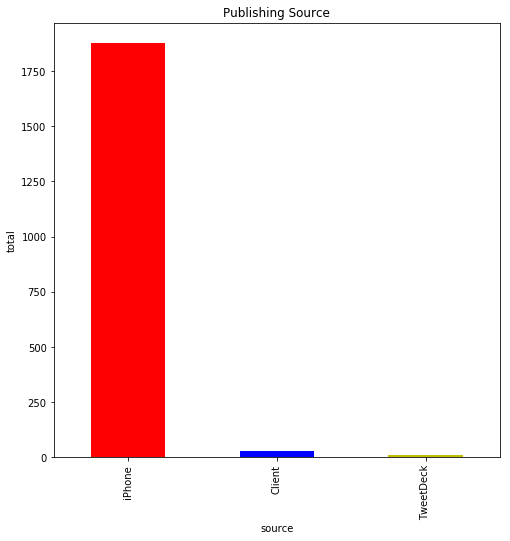

In [101]:
twitter_archive_clean.source.value_counts().plot.bar(color=('r','b','y','g'), figsize=(8,8));
plt.title('Publishing Source')
plt.xlabel('source')
plt.ylabel('total')

#### 结论
WeRateDogs最常用的发布推特的平台是iPhone

#### 2，哪种类型的狗可识别出狗的概率更大？哪种类型的狗识别不出狗的概率更大？

In [102]:
twitter_archive_clean[twitter_archive_clean.is_dog].dog_category.value_counts().head(5)

golden retriever      157
labrador retriever    108
pembroke               95
chihuahua              91
pug                    62
Name: dog_category, dtype: int64

Text(0,0.5,'count')

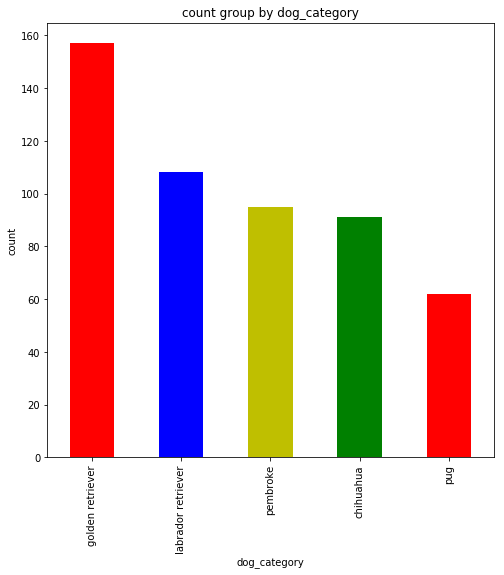

In [104]:
twitter_archive_clean[twitter_archive_clean.is_dog].dog_category.value_counts().head(5).plot.bar(color=('r','b','y','g'), figsize=(8,8));
plt.title('count group by dog_category')
plt.xlabel('dog_category')
plt.ylabel('count')

In [105]:
twitter_archive_clean[~twitter_archive_clean.is_dog].dog_category.value_counts().head(5)

web site        10
teddy            6
home theater     5
porcupine        5
minivan          5
Name: dog_category, dtype: int64

Text(0,0.5,'count')

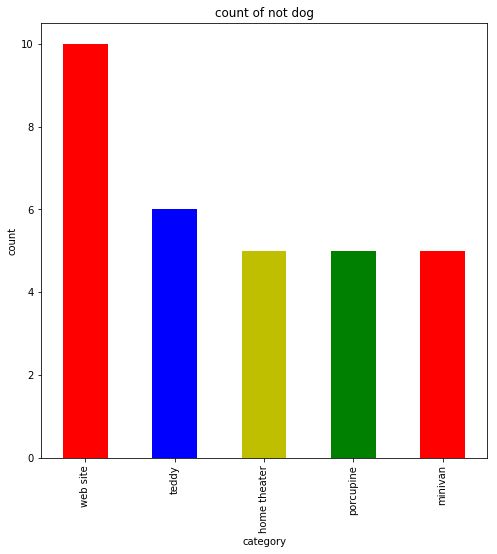

In [106]:
twitter_archive_clean[~twitter_archive_clean.is_dog].dog_category.value_counts().head(5).plot.bar(color=('r','b','y','g'), figsize=(8,8));
plt.title('count of not dog')
plt.xlabel('category')
plt.ylabel('count')

#### 结论
golden retriever这种类型的狗可识别概率最高，web site可识别概率最低，看样子分类名字也有问题。

#### 3, 哪种类型的狗转发量最大？哪种类型的狗最受喜欢？

In [107]:
twitter_archive_clean.groupby('dog_category').sum().retweet_count.sort_values(ascending=False).head(5)

dog_category
golden retriever      588494
labrador retriever    405312
pembroke              290602
chihuahua             253916
samoyed               202313
Name: retweet_count, dtype: int64

Text(0,0.5,'count')

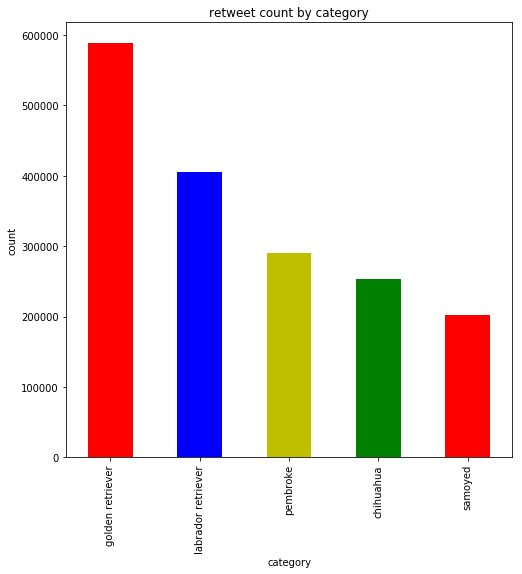

In [109]:
twitter_archive_clean.groupby('dog_category').sum().retweet_count.sort_values(ascending=False).head(5).\
plot.bar(color=('r','b','y','g'), figsize=(8,8));
plt.title('retweet count by category')
plt.xlabel('category')
plt.ylabel('count')

In [110]:
twitter_archive_clean.groupby('dog_category').sum().favorite_count.sort_values(ascending=False).head(5)

dog_category
golden retriever      1950826
labrador retriever    1269771
pembroke              1036321
chihuahua              756715
samoyed                582082
Name: favorite_count, dtype: int64

Text(0,0.5,'count')

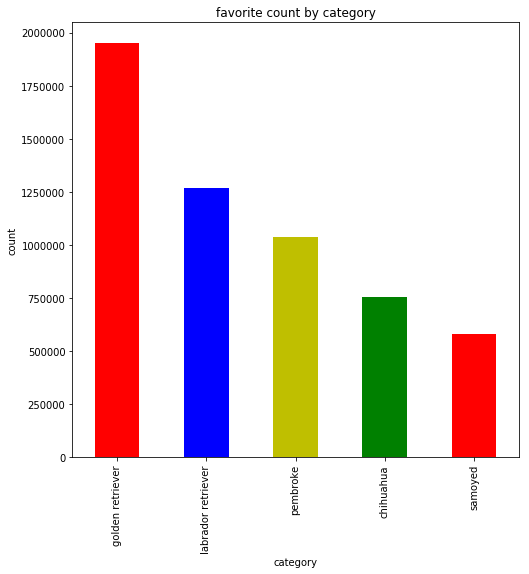

In [111]:
twitter_archive_clean.groupby('dog_category').sum().favorite_count.sort_values(ascending=False).head(5).\
plot.bar(color=('r','b','y','g'), figsize=(8,8));
plt.title('favorite count by category')
plt.xlabel('category')
plt.ylabel('count')

#### 结论
golden retriever这种狗是转发量最大和最受喜欢的品种